1. Stacked RNN Model
Steps:
Stacking RNN Layers: Adding more RNN layers to the model allows it to learn more complex patterns in the data.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.datasets import imdb

# Load and preprocess data
vocab_size = 10000
max_len = 100
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=vocab_size)
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Build the stacked RNN model
stacked_rnn_model = Sequential()
stacked_rnn_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
stacked_rnn_model.add(SimpleRNN(units=128, activation='tanh', return_sequences=True))
stacked_rnn_model.add(SimpleRNN(units=128, activation='tanh'))
stacked_rnn_model.add(Dropout(0.5))
stacked_rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
stacked_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_stacked = stacked_rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = stacked_rnn_model.evaluate(X_test, y_test)
print(f'Stacked RNN Test Accuracy: {test_acc:.2f}')


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 155ms/step - accuracy: 0.5159 - loss: 0.7414 - val_accuracy: 0.5428 - val_loss: 0.7094
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 61s 156ms/step - accuracy: 0.6756 - loss: 0.6027 - val_accuracy: 0.7862 - val_loss: 0.4632
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 149ms/step - accuracy: 0.8205 - loss: 0.4185 - val_accuracy: 0.7642 - val_loss: 0.6109
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 55s 141ms/step - accuracy: 0.8558 - loss: 0.3570 - val_accuracy: 0.8157 - val_loss: 0.4319
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 181ms/step - accuracy: 0.8852 - loss: 0.2959 - val_accuracy: 0.7938 - val_loss: 0.4438
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.7939 - loss: 0.4460
Stacked RNN Test Accuracy: 0.79


2. Bi-Directional RNN Model
Steps:
Bi-Directional RNN: A Bi-Directional RNN processes the input sequence in both forward and backward directions, capturing information from both past and future states.

In [3]:
from tensorflow.keras.layers import Bidirectional

# Build the bi-directional RNN model
bi_rnn_model = Sequential()
bi_rnn_model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
bi_rnn_model.add(Bidirectional(SimpleRNN(units=128, activation='tanh')))
bi_rnn_model.add(Dropout(0.5))
bi_rnn_model.add(Dense(1, activation='sigmoid'))

# Compile the model
bi_rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_bi = bi_rnn_model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = bi_rnn_model.evaluate(X_test, y_test)
print(f'Bi-Directional RNN Test Accuracy: {test_acc:.2f}')


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 70s 150ms/step - accuracy: 0.5156 - loss: 0.7098 - val_accuracy: 0.6778 - val_loss: 0.5950
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 46s 118ms/step - accuracy: 0.7682 - loss: 0.4919 - val_accuracy: 0.8033 - val_loss: 0.4327
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 58s 148ms/step - accuracy: 0.8137 - loss: 0.4333 - val_accuracy: 0.8098 - val_loss: 0.4504
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 71s 119ms/step - accuracy: 0.8524 - loss: 0.3624 - val_accuracy: 0.8074 - val_loss: 0.4869
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 49s 126ms/step - accuracy: 0.8689 - loss: 0.3231 - val_accuracy: 0.8017 - val_loss: 0.4744
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8023 - loss: 0.4757
Bi-Directional RNN Test Accuracy: 0.80


3. Performance Comparison
To compare the performance of the models, you can visualize the training and validation accuracy and loss for each model.

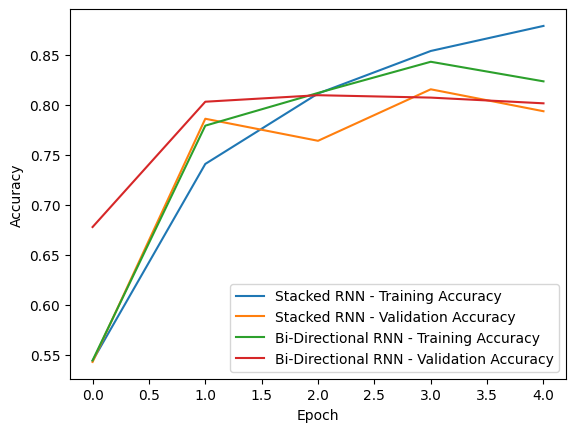

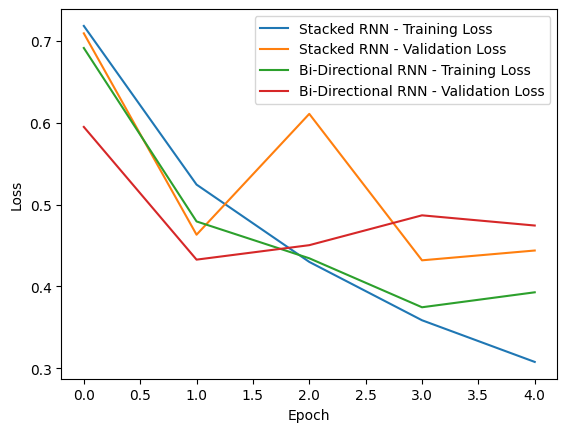

In [4]:
import matplotlib.pyplot as plt

# Plot accuracy for both models
plt.plot(history_stacked.history['accuracy'], label='Stacked RNN - Training Accuracy')
plt.plot(history_stacked.history['val_accuracy'], label='Stacked RNN - Validation Accuracy')
plt.plot(history_bi.history['accuracy'], label='Bi-Directional RNN - Training Accuracy')
plt.plot(history_bi.history['val_accuracy'], label='Bi-Directional RNN - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss for both models
plt.plot(history_stacked.history['loss'], label='Stacked RNN - Training Loss')
plt.plot(history_stacked.history['val_loss'], label='Stacked RNN - Validation Loss')
plt.plot(history_bi.history['loss'], label='Bi-Directional RNN - Training Loss')
plt.plot(history_bi.history['val_loss'], label='Bi-Directional RNN - Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
